<a href="https://colab.research.google.com/github/melisa9999/Python-Programming-and-Numerical-Methods-A-Guide-for-Engineers-and-Scientists--SOLUTIONS/blob/main/23.%20Boundary-Value%20Problems%20for%20ODES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

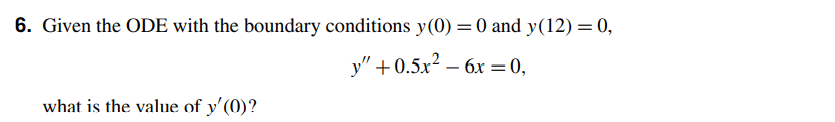

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ini = 0
final = 12
n = 50
h = (final - ini) / n
x = np.linspace(ini, final, n + 1)
A = np.zeros((n + 1, n + 1))
# Los siguientes dos valores deben ser 1 debido al aumento n+1 en
# las dimensiones de la matriz
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i + 1] = 1
    A[i, i - 1] = 1
    A[i, i] = -2

b = np.zeros(n + 1)
for i in range(1, n + 1):
    b[i] = (6 * x[i] - 0.5 * x[i]**2) * h**2
    b[-1] = 0

y = np.linalg.solve(A, b)  # LU descomposition

plt.figure(figsize=(10, 8))
plt.plot(x, y)

y_n1 = (6 * x[0] - 0.5 * x[0]**2) * h**2 + 2 * y[0] - y[1]
dy0 = (y[1] - y_n1) / 2 * h

# Para comparar con la sln exacta
y_exacta = -0.0416667 * x**4 + x**3 - 72 * x  # resuelta con mathematica :D
plt.plot(x, y_exacta)
plt.show()


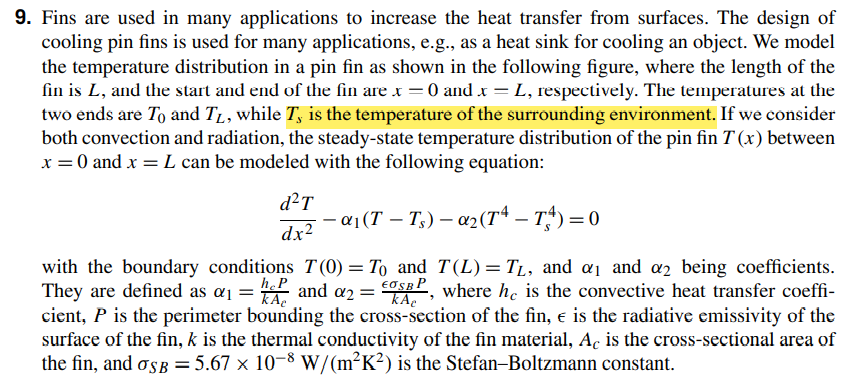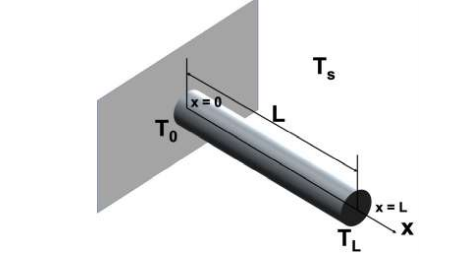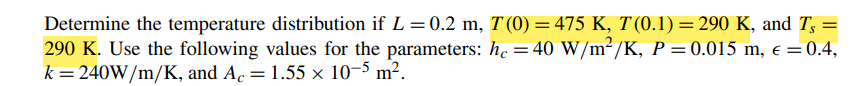

Here we ignore the radiative term



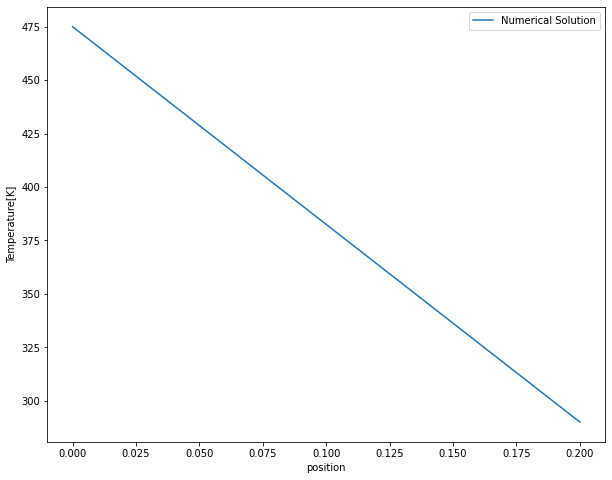

In [1]:
import numpy as np
import matplotlib.pyplot as plt
"""Geometry"""

x_L = 0.2
""" Grid in x"""

n = 10
h = x_L / n
x = np.linspace(0, x_L, n + 1)
""" Material Properties """

hc = 40
Ts = 290
k = 240
Ac = 1.55e-5
sigmaSB = 5.67e-8
P = 0.015
epsilon = 0.4
alpha1 = hc * P / k * Ac
alpha2 = epsilon * sigmaSB * P / k * Ac
""" Boundary conditions """
T0 = 475
TL = 290

T = np.ones(n + 1) * 30
T[0] = T0
T[n] = TL

ii = 0
while ii < 100:
    for i in range(1, n):
        T[i] = (alpha1 * h**2 * Ts + T[i - 1] + T[i + 1]) / (2 + alpha1 * h**2)
    ii += 1

plt.figure(figsize=(10, 8))
plt.plot(x, T)

plt.xlabel("position")
plt.ylabel("Temperature[K]")
plt.legend(["Numerical Solution", 'Exact Solution'])
plt.show()
